# Многорукие бандиты для Кредитного скоринга

Цель состоит в том, чтобы создать автоматическую систему обучения с подкреплением для управления системой выдачи кредитов.
Идея состоит в том, что когда клиент обращается в банк с просьбой о кредите, система выдает его (действие 1) или нет (действие 0).
Поэтому система обучения с подкреплением имеет **два возможных действия**.

С другой стороны, полученная награда:

- 0, если система решает не предлагать кредит клиенту
- 1, если вам предложили кредит и вы **оплатили его**
- -10, если вам предложили кредит и вы **не платите его**

Для построения системы у нас есть следующий набор данных:
https://drive.google.com/file/d/1TdTDAjndt5sn_7HKwc1PifcaQTRNHzkR/view?usp=sharing


Он загружен и отображается ниже:

In [1]:
import pandas as pd
import warnings

pd.options.display.max_colwidth = 200
warnings.filterwarnings("ignore")

**Информация о каждой переменной:**

In [2]:
info_variables = pd.read_excel("DataDictionary.xlsx")
info_variables

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Лицо имело просроченную задолженность на 90 дней или более,Y/N
1,RevolvingUtilizationOfUnsecuredLines,"Общий остаток по кредитным картам и личным кредитным линиям, за исключением недвижимости и задолженности без рассрочки, например, автокредитов, деленный на сумму кредитных лимитов",percentage
2,age,Возраст заемщика в годах,integer
3,NumberOfTime30-59DaysPastDueNotWorse,"Количество раз, когда заемщик просрочил платеж на 30–59 дней, но не больше, за последние 2 года.",integer
4,DebtRatio,"Ежемесячные выплаты по долгам, алименты, расходы на проживание, деленные на ежемесячный валовой доход",percentage
5,MonthlyIncome,Ежемесячный доход,real
6,NumberOfOpenCreditLinesAndLoans,"Количество открытых кредитов (кредиты с рассрочкой платежа, например, автокредит или ипотека) и кредитных линий (например, кредитные карты)",integer
7,NumberOfTimes90DaysLate,Количество просрочек заемщика на 90 дней и более.,integer
8,NumberRealEstateLoansOrLines,"Количество ипотечных кредитов и кредитов на недвижимость, включая кредитные линии под залог жилья",integer
9,NumberOfTime60-89DaysPastDueNotWorse,"Количество раз, когда заемщик просрочил платеж на 60–89 дней, но не больше за последние 2 года.",integer


**База данных:**

In [3]:
df = pd.read_csv("./cs.csv")
df.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [4]:
df.describe().T[["count", "min", "max", "mean", "std"]]

,count,min,max,mean,std
SeriousDlqin2yrs,150000.0,0.0,1.0,0.066840,0.249746
RevolvingUtilizationOfUnsecuredLines,150000.0,0.0,50708.0,6.048438,249.755371
age,150000.0,0.0,109.0,52.295207,14.771866
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.0,98.0,0.421033,4.192781
DebtRatio,150000.0,0.0,329664.0,353.005076,2037.818523
MonthlyIncome,120269.0,0.0,3008750.0,6670.221237,14384.674215
NumberOfOpenCreditLinesAndLoans,150000.0,0.0,58.0,8.452760,5.145951
NumberOfTimes90DaysLate,150000.0,0.0,98.0,0.265973,4.169304
NumberRealEstateLoansOrLines,150000.0,0.0,54.0,1.018240,1.129771
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.0,98.0,0.240387,4.155179


In [5]:
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [6]:
(df["MonthlyIncome"].isna() & df["NumberOfDependents"].isna()).sum()

3924

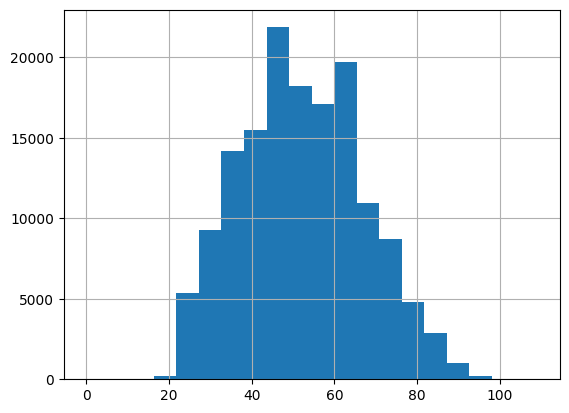

In [7]:
df["age"].hist(bins=20);

In [8]:
df["NumberOfTime30-59DaysPastDueNotWorse"].value_counts()

NumberOfTime30-59DaysPastDueNotWorse
0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: count, dtype: int64

In [9]:
# базовая чистка:
#
#1- Удаляем строки с пропущенными значениями (MonthlyIncome и NumberOfDependents)
#2- У нас останавливаются только люди от 18 до 70 лет (включительно)
# 3. Мы удаляем строки, в которых есть 96 или 98 в запаздывающих столбцах.
# (NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate)

df.dropna(inplace=True)
df = df[ (df["age"]>=18) & (df["age"]<=70) ]

df = df[ ~df["NumberOfTime30-59DaysPastDueNotWorse"].isin([96, 98]) ]
df = df[ ~df["NumberOfTime60-89DaysPastDueNotWorse"].isin([96, 98]) ]
df = df[ ~df["NumberOfTimes90DaysLate"].isin([96, 98]) ]

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,107883.0,0.073728,0.261329,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,107883.0,6.262285,268.425237,0.0,0.042982,0.206481,0.617870,50708.0
age,107883.0,48.343835,11.909195,21.0,39.000000,49.000000,58.000000,70.0
NumberOfTime30-59DaysPastDueNotWorse,107883.0,0.276781,0.739606,0.0,0.000000,0.000000,0.000000,13.0
DebtRatio,107883.0,27.426863,395.986811,0.0,0.162018,0.308917,0.493251,60212.0
MonthlyIncome,107883.0,6800.816625,14941.921271,0.0,3500.000000,5500.000000,8344.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,107883.0,8.774265,5.155074,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,107883.0,0.098588,0.509666,0.0,0.000000,0.000000,0.000000,17.0
NumberRealEstateLoansOrLines,107883.0,1.095233,1.157615,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,107883.0,0.072106,0.348840,0.0,0.000000,0.000000,0.000000,11.0


Столбец **SeriousDlqin2yrs** имеет значение 0, если клиент выплачивает кредит, и 1, если клиент его не выплачивает.

Теперь разделим набор данных на обучающий и тестовый:

In [11]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, random_state=1, test_size=0.3, stratify=df["SeriousDlqin2yrs"])

In [12]:
# частота неплатежей за обучение и тестирование (в процентах от 1):

df_train["SeriousDlqin2yrs"].mean(), df_test["SeriousDlqin2yrs"].mean()

(0.07373076617495167, 0.073721612853391)

In [13]:
# Я определяю класс клиентов:

class clientes:
    def __init__(self, df, penalty = -10): # self: внутренние параметры
        # мой класс будет иметь два внутренних параметра:
        # i, df
        self.i = -1 # i: бухгалтер (клиентов); индекс к последнему показанному клиенту
        self.df = df
        self.penalty = penalty
    def cliente(self): # Он будет имитировать прибытие клиента
        self.i = self.i + 1
        if self.i == len(self.df):
            self.i = 0
    def get_context(self): # вы собираетесь извлечь данные из этого клиента
        return self.df.iloc[self.i].drop("SeriousDlqin2yrs")
    def get_reward(self, action): # вознаграждение с этим клиентом
        # Я рассчитываю вознаграждение:
        if action==0: # не отдавай должное
            return 0
        # кредит предоставляется:
        if self.df.iloc[self.i]["SeriousDlqin2yrs"] == 1: # не платит
            return self.penalty
        return 1 # платить
    
    def getBestReward(self):
        return max(self.get_reward(0), self.get_reward(1))

In [14]:
# клиентов: класс
# cl_train: экземпляр этого класса
#cl_test: еще один экземпляр этого класса
#
# мы можем видеть cl_train как «коробку», в которой у нас есть
# поместите набор обучающих данных, и там будет
# методы, которые позволяют мне взаимодействовать с ним
#
# То же самое с cl_test, но для тестовых данных

cl_train = clientes(df_train)
cl_test  = clientes(df_test)

In [15]:
cl_train.cliente() # Я моделирую приход нового клиента

In [16]:
cl_train.get_context()

RevolvingUtilizationOfUnsecuredLines        0.064833
age                                        59.000000
NumberOfTime30-59DaysPastDueNotWorse        0.000000
DebtRatio                                   0.156957
MonthlyIncome                           16666.000000
NumberOfOpenCreditLinesAndLoans             5.000000
NumberOfTimes90DaysLate                     0.000000
NumberRealEstateLoansOrLines                1.000000
NumberOfTime60-89DaysPastDueNotWorse        0.000000
NumberOfDependents                          2.000000
Name: 135262, dtype: float64

In [17]:
cl_train.get_context().values

array([6.48325870e-02, 5.90000000e+01, 0.00000000e+00, 1.56956861e-01,
       1.66660000e+04, 5.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 2.00000000e+00])

In [18]:
cl_train.cliente()
cl_train.get_context()

RevolvingUtilizationOfUnsecuredLines       0.209079
age                                       30.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.129946
MonthlyIncome                           2400.000000
NumberOfOpenCreditLinesAndLoans            7.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               0.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
Name: 14308, dtype: float64

In [19]:
cl_train.get_reward(0)

0

In [20]:
cl_train.getBestReward()

1

# **Задачи, которые необходимо выполнить**

### Задача 1. Рассчитайте эволюцию общего вознаграждения и общего сожаления при обучении:
1. Случайный алгоритм
2. Алгоритм, который всегда отдает должное
3. Алгоритм, который никогда не отдает должное

Рассчитайте эволюцию вашего среднего вознаграждения и среднего сожаления на другом графике. Имеют ли результаты смысл?

In [21]:
from tqdm import tqdm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('figure', figsize=(15, 4))
np.random.seed(1234)

available_actions = [0,1] #Дать или нет кредит

In [22]:
def makePlots(reward_total_vec, reward_promedio, regret_total_vec, regret_promedio):
    plt.subplot(1,2,1)
    plt.plot(reward_promedio, label = 'Reward среднее', c = 'red')
    plt.plot(regret_promedio, label = 'Regret среднее ', c = 'blue')
    plt.title("Эволюция среднего Reward и Regret")
    plt.legend()
    plt.grid()

    plt.subplot(1,2,2)
    plt.plot(reward_total_vec, label = 'Общая сумма Reward', c = 'red')
    plt.plot(regret_total_vec, label = 'Общая сумма Regret', c = 'blue')
    plt.title("Эволюция общей суммы Reward и Regred")
    plt.legend()
    plt.grid()

#### 1. Случайный алгоритм

In [23]:
N = 10_000

100%|██████████| 10000/10000 [00:00<00:00, 19053.60it/s]


Reward promedio: 0.1548
Regret promedio: 0.7775


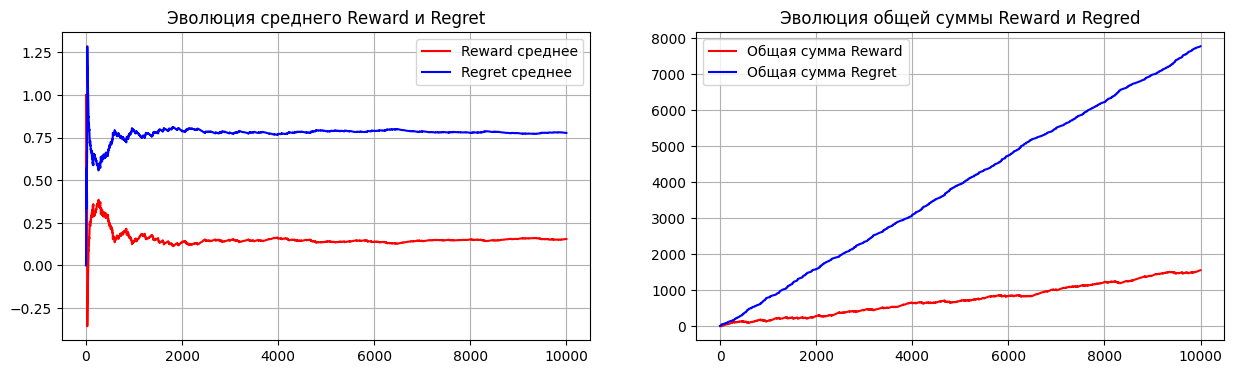

In [24]:
# Reward
reward_promedio = []
reward_total = 0
reward_total_vec = []

#Regret
regret_promedio = []
regret_total = 0
regret_total_vec = []

for i in tqdm(range(N)):
    cl_train.cliente()
    action = np.random.choice(len(available_actions))
    reward = cl_train.get_reward(action)
    reward_total += reward
    regret = cl_train.getBestReward()-reward
    regret_total += regret
    reward_promedio.append(reward_total/(i+1)) # i+1 — количество итераций
    reward_total_vec.append(reward_total)
    regret_promedio.append(regret_total/(i+1))
    regret_total_vec.append(regret_total)


print("Reward promedio:", reward_total/N)
print("Regret promedio:", regret_total/N)
makePlots(reward_total_vec, reward_promedio, regret_total_vec, regret_promedio)

**ОТВЕТ:** Полученные графики представляют случайное поведение (что является отправной точкой). Полученные графики являются ожидаемыми, имеющими в среднем гораздо большее сожаление, чем вознаграждение, это связано с тем, что давать кредит очень дорого (-10) и клиент не платит.

#### 2. Алгоритм, который всегда отдает должное

100%|██████████| 10000/10000 [00:00<00:00, 21297.37it/s]


Reward promedio: 0.1574
Regret promedio: 0.766


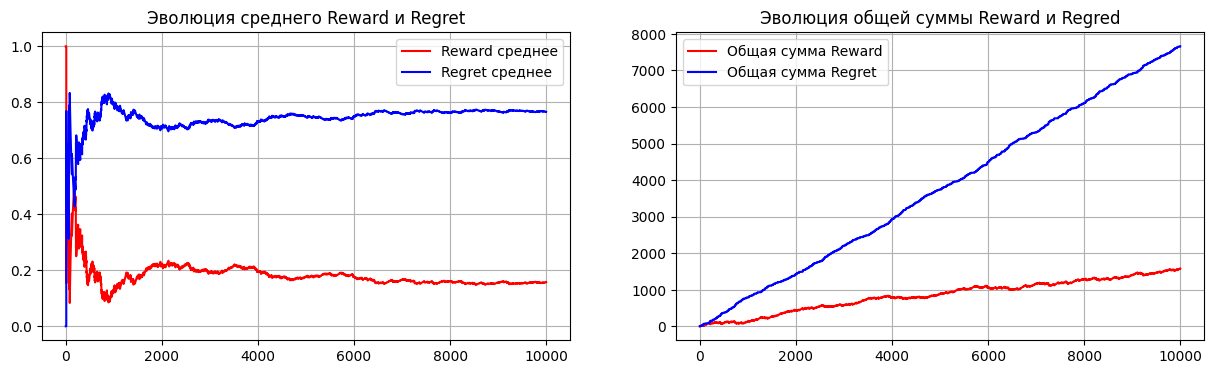

In [25]:
# Reward
reward_promedio = []
reward_total = 0
reward_total_vec = []

#Regret
regret_promedio = []
regret_total = 0
regret_total_vec = []

for i in tqdm(range(N)):
    cl_train.cliente()
    action = 1 # Всегда отдавайте должное
    reward = cl_train.get_reward(action)
    reward_total += reward
    regret = cl_train.getBestReward()-reward
    regret_total += regret
    reward_promedio.append(reward_total/(i+1)) # i+1 — количество итераций
    reward_total_vec.append(reward_total)
    regret_promedio.append(regret_total/(i+1))
    regret_total_vec.append(regret_total)

print("Reward promedio:", reward_total/N)
print("Regret promedio:", regret_total/N)
makePlots(reward_total_vec, reward_promedio, regret_total_vec, regret_promedio)

**ОТВЕТ:** В этом случае видно, что среднее вознаграждение немного выше по сравнению с тем, которое получается при выполнении случайных действий. В этом случае, всегда отдавая должное, мы видим, что это работает лучше, чем случайное поведение, однако в реальной жизни это не идеально.

#### 3. Алгоритм, который никогда не отдает должное

100%|██████████| 10000/10000 [00:00<00:00, 42275.45it/s]


Reward promedio: 0.0
Regret promedio: 0.9283


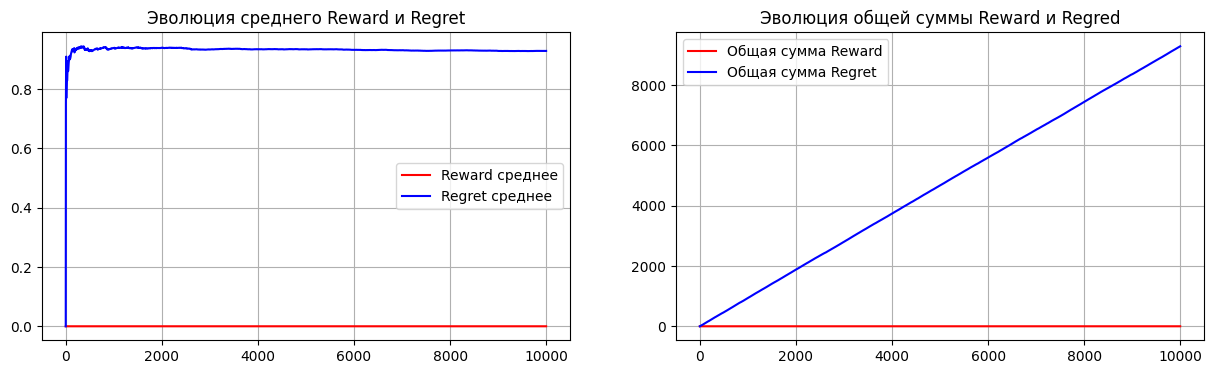

In [26]:
# Reward
reward_promedio = []
reward_total = 0
reward_total_vec = []

#Regret
regret_promedio = []
regret_total = 0
regret_total_vec = []

for i in tqdm(range(N)):
    cl_train.cliente()
    action = 0 # Никогда не дает кредит
    reward = cl_train.get_reward(action)
    reward_total += reward
    regret = cl_train.getBestReward()-reward
    regret_total += regret
    reward_promedio.append(reward_total/(i+1)) # i+1 — количество итераций
    reward_total_vec.append(reward_total)
    regret_promedio.append(regret_total/(i+1))
    regret_total_vec.append(regret_total)


print("Reward promedio:", reward_total/N)
print("Regret promedio:", regret_total/N)
makePlots(reward_total_vec, reward_promedio, regret_total_vec, regret_promedio)

**ОТВЕТ:** Полученные графики имеют большой смысл, поскольку среднее вознаграждение равно нулю, поскольку кредит никогда не выдается (выгода никогда не получается). В то время как сожаление стабилизируется на уровне 1.

### Задача 2: Обучить **неконтекстуального** многорукого бандита на тренировке. Рассчитайте те же метрики, что и в пункте 1. Какую стратегию изучает модель?

Далее реализуется неконтекстный $\epsilon$-жадный алгоритм с затуханием.

In [27]:
class EpsilonGreedy:
    def __init__(self, nActions, epsilon):
        self.nActions = nActions
        self.epsilon = epsilon
        self.nveces = np.zeros(nActions)
        self.suma_rs = np.zeros(nActions)
        self.Qs = -10*np.ones(nActions)

    def choose_action(self):
        if np.random.rand() < self.epsilon: # Мы исследовали?
            return np.random.choice(self.nActions)
        return np.argmax(self.Qs)
    
    def update(self, action, r): # с помощью этой функции агент «обучается»
        self.nveces[action] += 1 # прибавляем 1 к количеству раз выполнения действия «действие»
        self.suma_rs[action] += r # мы добавляем r к общей награде, связанной с этим действием
        self.Qs[action] = self.suma_rs[action] / self.nveces[action] # мы пересчитываем Q

    def setEpsilon(self, epsilon):
        self.epsilon = epsilon

Проведем обучение бесконтекстного агента $\epsilon$-жадного. В отличие от предыдущих алгоритмов, на этот раз модель учится предпринимать наилучшие действия (которые максимизируют $Q(a)$).

100%|██████████| 10000/10000 [00:00<00:00, 17721.43it/s]


Reward promedio: 0.0701
Regret promedio: 0.8529
Agent: 
 - Qs: [0.         0.10283116]
 - N Acciones: [3183. 6817.]
 - Total Rewards: [  0. 701.]


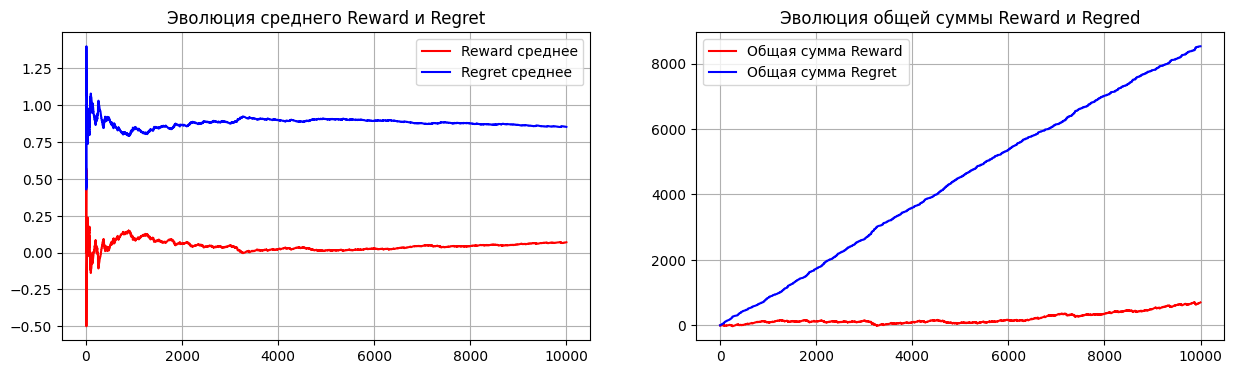

In [28]:
# Reward
reward_promedio = []
reward_total = 0
reward_total_vec = []

#Regret
regret_promedio = []
regret_total = 0
regret_total_vec = []

# Agente no contextual
agent = EpsilonGreedy(epsilon=1, nActions=len(available_actions))
decay_rate = 0.9999 # скорость распада

for i in tqdm(range(N)):
    cl_train.cliente()

    # Выбираем действие по жадному
    action = agent.choose_action()
    reward = cl_train.get_reward(action)

    # Обновляем Q агента
    agent.update(action, reward)

    reward_total += reward
    regret = cl_train.getBestReward()-reward
    regret_total += regret
    reward_promedio.append(reward_total/(i+1)) # i+1 — количество итераций
    reward_total_vec.append(reward_total)
    regret_promedio.append(regret_total/(i+1))
    regret_total_vec.append(regret_total)

    # Decaying epsilon
    agent.setEpsilon(agent.epsilon*decay_rate)

print("Reward promedio:", reward_total/N)
print("Regret promedio:", regret_total/N)
print("Agent: \n - Qs: {}\n - N Acciones: {}\n - Total Rewards: {}".format(agent.Qs, agent.nveces, agent.suma_rs))
makePlots(reward_total_vec, reward_promedio, regret_total_vec, regret_promedio)

**ОТВЕТ:** В этом случае стратегия, которую изучает модель, состоит в том, чтобы всегда отдавать должное, поскольку, если она не дает никакого вознаграждения, вознаграждение равно нулю, а если оно дается, получается положительное или отрицательное подкрепление (в среднем всегда лучше отдать должное). Однако можно видеть, что среднее вознаграждение ниже, чем у алгоритма, который всегда дает кредит, это потому, что первоначально агент начинает исследовать, а затем только эксплуатирует (обнаружив, что всегда давать кредит в среднем лучше, чем никогда его не давать). .

### Задание 3: Обучить линейного контекстного многорукого бандита на тренировке. Рассчитайте те же метрики, что и в предыдущих пунктах.

In [29]:
from space_bandits import LinearBandits

In [30]:
features = np.array(cl_train.get_context().index.tolist())
n_features = len(features)
print('Features: {}\nnFeatures: {}'.format(features, n_features))

Features: ['RevolvingUtilizationOfUnsecuredLines' 'age'
 'NumberOfTime30-59DaysPastDueNotWorse' 'DebtRatio' 'MonthlyIncome'
 'NumberOfOpenCreditLinesAndLoans' 'NumberOfTimes90DaysLate'
 'NumberRealEstateLoansOrLines' 'NumberOfTime60-89DaysPastDueNotWorse'
 'NumberOfDependents']
nFeatures: 10


100%|██████████| 10000/10000 [00:15<00:00, 653.62it/s]


Reward promedio: 0.5104
Regret promedio: 0.4144


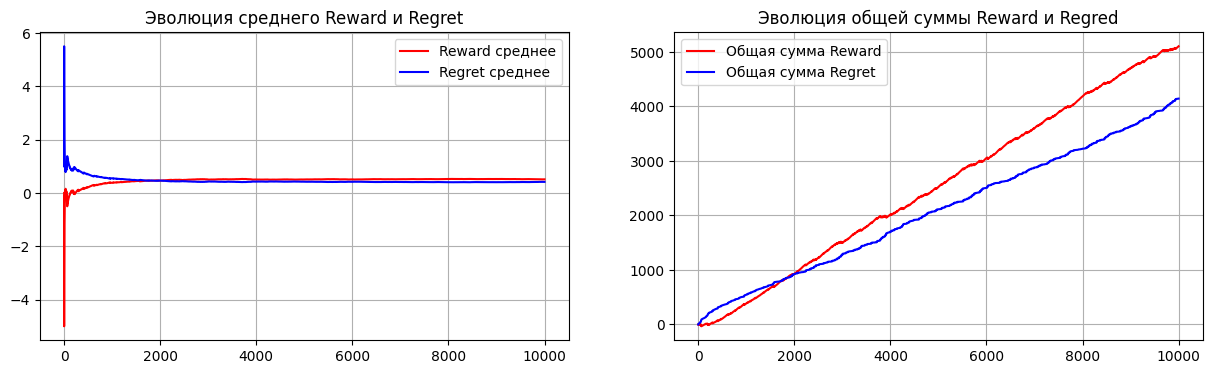

 23%|█████████                              | 233/1000 [00:00<00:01, 590.96it/s]/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer key

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
 29%|███████████▍                           | 293/1000 [00:00<00:01, 580.98it/s]/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer key

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
 35%|█████████████▊                         | 353/1000 [00:00<00:01, 583.11it/s]/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer key

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
 47%|██████████████████▎                    | 471/1000 [00:00<00:00, 582.46it/s]/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer key

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

 58%|██████████████████████▊                | 585/1000 [00:01<00:00, 500.40it/s]/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer key

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

 89%|██████████████████████████████████▋    | 889/1000 [00:01<00:00, 326.67it/s]/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer key

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context = torch.tensor(context.astype(float))
/opt/anaconda3/lib/python3.11/site-packages/space_bandits/contextual_dataset.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

In [31]:
# Reward
reward_promedio = []
reward_total = 0
reward_total_vec = []

#Regret
regret_promedio = []
regret_total = 0
regret_total_vec = []

# Agente contextual lineal
agent = LinearBandits(len(available_actions), n_features, initial_pulls=100)

for i in tqdm(range(N)):
    cl_train.cliente()

    # Мы получаем контекст
    contexto = cl_train.get_context()

    # Выбираем действие по контексту
    action = agent.action(np.array(contexto))
    reward = cl_train.get_reward(action)

    # Обновляем модель
    agent.update(contexto, action, reward)

    reward_total += reward
    regret = cl_train.getBestReward()-reward
    regret_total += regret
    reward_promedio.append(reward_total/(i+1)) # i+1 — количество итераций
    reward_total_vec.append(reward_total)
    regret_promedio.append(regret_total/(i+1))
    regret_total_vec.append(regret_total)

print("Reward promedio:", reward_total/N)
print("Regret promedio:", regret_total/N)
makePlots(reward_total_vec, reward_promedio, regret_total_vec, regret_promedio)

**ОТВЕТ:** В этом случае видно, что при использовании линейной модели, основанной на контексте, результаты получаются значительно выше, чем у предыдущих алгоритмов. Мы получаем среднее вознаграждение и сожаление 0,51 и 0,41 соответственно. Кроме того, можно отметить, что модель выполняет свою работу, поскольку, зная контекст каждого клиента, можно сделать лучший вывод о том, отдавать должное или нет, получая большую общую награду (большую, чем сожаление).

### Задача 4. Рассчитайте для некоторых обучающих клиентов Q, заданную моделью для каждого действия. Проверьте, получаются ли у вас одинаковые значения, рассчитав их самостоятельно. Проверьте, является ли действие, выбранное моделью, самым высоким Q.

Ниже приведены Q, полученные с помощью модели:

In [32]:
linear_Qs = agent.mu
linear_Qs

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-8.98625238e-01,  7.59130680e-03, -4.08815658e-01, -3.95205649e-03,
         1.64308523e-06, -7.07399651e-03, -1.20216308e+00, -3.44177718e-02,
        -1.80452968e+00,  7.73842762e-04,  6.46147300e-01])]

Значения Q будут рассчитаны для 3 клиентов:

**Расчет Q для первого клиента:**

In [33]:
cl_train.cliente()
contexto = cl_train.get_context()
print('Id: {}\nContexto: \n{}'.format(cl_train.i, contexto))

Id: 50002
Contexto: 
RevolvingUtilizationOfUnsecuredLines       0.102297
age                                       46.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.279188
MonthlyIncome                           6500.000000
NumberOfOpenCreditLinesAndLoans            6.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               1.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         3.000000
Name: 88275, dtype: float64


Ожидаемая стоимость модели:

В этом случае кредит будет предоставлен клиенту.

In [34]:
print('Qs оценивается по модели:',agent.expected_values(np.array(contexto)))

Qs оценивается по модели: [0.         0.83845758]


Ручной расчет:

Важно отметить, что Q модели имеют размерности [2, 11], поскольку последнее значение соответствует пересечению линейной модели (у нас есть 10 контекстных переменных). Можно отметить, что мы вручную получили тот же результат, что и модель.

In [35]:
# Q имеет 11 значений, так как последнее значение соответствует перехвату
# поэтому мы инициализируем сумму qs с помощью перехвата
total_qs = [linear_Qs[0][len(contexto)],linear_Qs[1][len(contexto)]]
for i in range(len(available_actions)):
    for j in range(len(contexto)):
        total_qs[i]+=agent.mu[i][j]*contexto.iloc[j]
print('Вопросы, полученные вручную:',total_qs)

Вопросы, полученные вручную: [0.0, 0.8384575807370819]


Действие, которое предпринимает модель, — это отдать должное (1).

In [36]:
print('Действия, предпринятые моделью:',agent.action(np.array(contexto)))

Действия, предпринятые моделью: 1


**Расчет Q для второго клиента:**

In [119]:
cl_train.cliente()
contexto = cl_train.get_context()
print('Id: {}\nContexto: \n{}'.format(cl_train.i, contexto))
print('\n-------------------------\n')
print('Qs estimadas por el modelo:',agent.expected_values(np.array(contexto)))
# Q cuenta con 11 valores ya que el último valor corresponde al intercepto
# por lo que inicializamos el total de las qs con el intercepto
total_qs = [linear_Qs[0][len(contexto)],linear_Qs[1][len(contexto)]]
for i in range(len(available_actions)):
    for j in range(len(contexto)):
        total_qs[i]+=agent.mu[i][j]*contexto.iloc[j]
print('Qs obtenidas manualmente:',total_qs)
print('Acción tomada por el modelo:',agent.action(np.array(contexto)))

Id: 50003
Contexto: 
RevolvingUtilizationOfUnsecuredLines        0.459051
age                                        51.000000
NumberOfTime30-59DaysPastDueNotWorse        0.000000
DebtRatio                                   0.161811
MonthlyIncome                           10400.000000
NumberOfOpenCreditLinesAndLoans             8.000000
NumberOfTimes90DaysLate                     0.000000
NumberRealEstateLoansOrLines                1.000000
NumberOfTime60-89DaysPastDueNotWorse        0.000000
NumberOfDependents                          4.000000
Name: 80943, dtype: float64

-------------------------

Qs estimadas por el modelo: [0.         0.55909039]
Qs obtenidas manualmente: [0.0, 0.5590903918588079]
Acción tomada por el modelo: 1


**Cálculo de las Qs para el tercer cliente:**

In [120]:
cl_train.cliente()
contexto = cl_train.get_context()
print('Id: {}\nContexto: \n{}'.format(cl_train.i, contexto))
print('\n-------------------------\n')
print('Qs estimadas por el modelo:',agent.expected_values(np.array(contexto)))
# Q cuenta con 11 valores ya que el último valor corresponde al intercepto
# por lo que inicializamos el total de las qs con el intercepto
total_qs = [linear_Qs[0][len(contexto)],linear_Qs[1][len(contexto)]]
for i in range(len(available_actions)):
    for j in range(len(contexto)):
        total_qs[i]+=agent.mu[i][j]*contexto.iloc[j]
print('Qs obtenidas manualmente:',total_qs)
print('Acción tomada por el modelo:',agent.action(np.array(contexto)))

Id: 50004
Contexto: 
RevolvingUtilizationOfUnsecuredLines       0.423534
age                                       37.000000
NumberOfTime30-59DaysPastDueNotWorse       1.000000
DebtRatio                                  0.184272
MonthlyIncome                           3000.000000
NumberOfOpenCreditLinesAndLoans            4.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               0.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
Name: 14372, dtype: float64

-------------------------

Qs estimadas por el modelo: [0.         0.00642149]
Qs obtenidas manualmente: [0.0, 0.006421494060668293]
Acción tomada por el modelo: 0


### Tarea 5: Calcula en test el rendimiento del algoritmo de multiarmed bandit. Compáralo con el grupo de control de test (reserva un 10% de clientes en test como grupo de control).

A continuación, reservamos un 10% de los datos de test para control.

In [121]:
df_test2, df_control = train_test_split(df, random_state=1, test_size=0.1, stratify=df["SeriousDlqin2yrs"])

In [122]:
cl_test2 = clientes(df_test2)
cl_control = clientes(df_control)

In [123]:
cl_test2.get_context()

RevolvingUtilizationOfUnsecuredLines       0.092123
age                                       52.000000
NumberOfTime30-59DaysPastDueNotWorse       2.000000
DebtRatio                                  0.384418
MonthlyIncome                           6250.000000
NumberOfOpenCreditLinesAndLoans           11.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               2.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         2.000000
Name: 104896, dtype: float64

Probamos el rendimiento del modelo con los datos de test2 (80% de los datos de test origianles).

100%|██████████| 10000/10000 [00:04<00:00, 2064.17it/s]


Reward promedio: 0.5457
Regret promedio: 0.3844


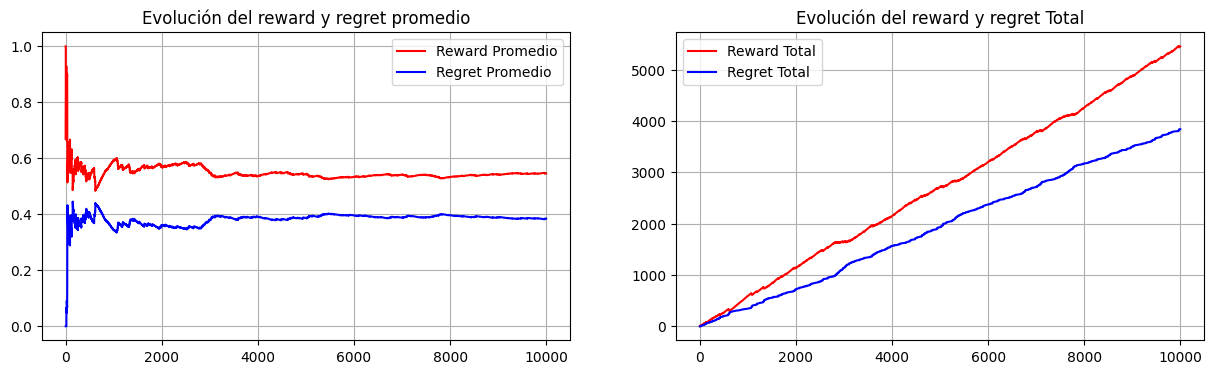

In [124]:
# Reward
reward_promedio = []
reward_total = 0
reward_total_vec = []

#Regret
regret_promedio = []
regret_total = 0
regret_total_vec = []

for i in tqdm(range(N)):
    cl_test2.cliente()

    # Obtenemos el contexto
    contexto = cl_test2.get_context()

    # Escogemos una acción de acuerdo al contexto
    action = agent.action(np.array(contexto))
    reward = cl_test2.get_reward(action)

    # Actuaizamos el modelo
    reward_total += reward
    regret = cl_test2.getBestReward()-reward
    regret_total += regret
    reward_promedio.append(reward_total/(i+1)) # i+1 es el número de iteraciones
    reward_total_vec.append(reward_total)
    regret_promedio.append(regret_total/(i+1))
    regret_total_vec.append(regret_total)

print("Reward promedio:", reward_total/N)
print("Regret promedio:", regret_total/N)
makePlots(reward_total_vec, reward_promedio, regret_total_vec, regret_promedio)

**RESPUESTA:** Se puede notar que el rendimiento del modelo se mantiene en los datos de test2, incluso se obtiene un reward promedio levemente por encima de el reward obtenido en entrenamiento.

Ahora vamos a realizar el experimento con el grupo de control (se va a dar créditos de forma aleatoria).

100%|██████████| 10000/10000 [00:00<00:00, 15314.91it/s]


Reward promedio: 0.0858
Regret promedio: 0.8414


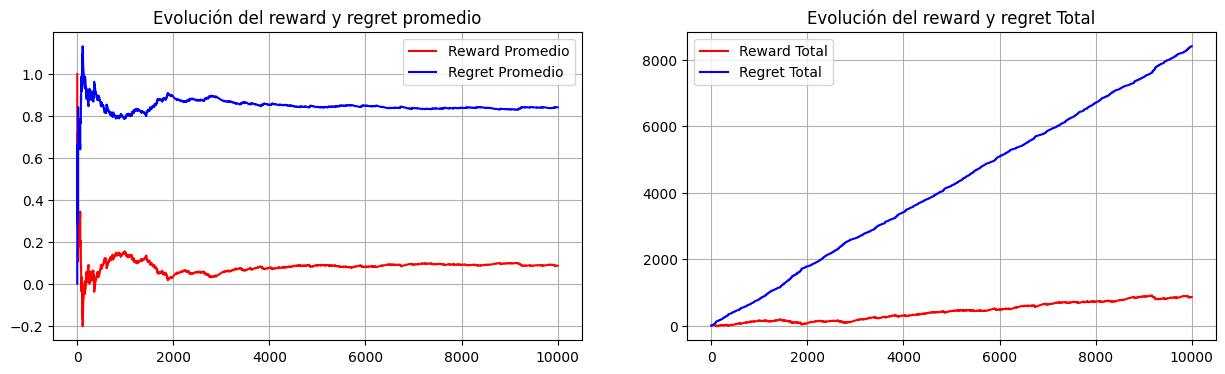

In [125]:
# Reward
reward_promedio = []
reward_total = 0
reward_total_vec = []

#Regret
regret_promedio = []
regret_total = 0
regret_total_vec = []

for i in tqdm(range(N)):
    cl_control.cliente()
    action = np.random.choice(len(available_actions))
    reward = cl_control.get_reward(action)
    reward_total += reward
    regret = cl_control.getBestReward()-reward
    regret_total += regret
    reward_promedio.append(reward_total/(i+1)) # i+1 es el número de iteraciones
    reward_total_vec.append(reward_total)
    regret_promedio.append(regret_total/(i+1))
    regret_total_vec.append(regret_total)


print("Reward promedio:", reward_total/N)
print("Regret promedio:", regret_total/N)
makePlots(reward_total_vec, reward_promedio, regret_total_vec, regret_promedio)

**RESPUESTA:** Se puede apreciar que al otorgar créditos de forma aleatoria en el grupo de control se obtienen resultados muy por debajo de los obtenido utilizando el modelo previamente entrenado, lo que demuestra que el modelo esta funcionando, maximizando el reward obtenido a ejecutar las acciones correspondientes.

### Tarea 6: Obtén la interpretabilidad del modelo. ¿En qué variables se está fijando para decidir?

A continuación, vamos a utilizar los datos de test para obtener la interpretabilidad del modelo.

In [126]:
X_test = df_test.copy()
y_test = list(df_test['SeriousDlqin2yrs'])
X_test.drop(columns=['SeriousDlqin2yrs'], inplace=True)
print(X_test.shape)
X_test.head()

(32365, 10)


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
86820,0.429702,59,3,0.201624,13420.0,13,0,2,0,2.0
63852,0.717724,53,2,0.508987,8400.0,20,0,2,0,1.0
109304,1.000000,33,0,0.281594,13000.0,11,0,1,1,2.0
131988,0.889311,57,0,0.273563,6747.0,5,1,1,0,1.0
125320,0.271875,53,1,0.510943,9000.0,10,0,2,0,4.0


Guardamos la predicciones del agente.

In [127]:
taked_actions = []
for i in range(len(X_test)):
    contexto = X_test.iloc[i]
    action = agent.action(np.array(contexto))
    taked_actions.append(action)
print('Total de Acciones tomadas:',len(taked_actions))

Total de Acciones tomadas: 32365


Ahora vamos a entrenar un árbol de decisión con el obejetivo de interpretar el modelo obtenido por el agente (modelo subrogado).

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(max_leaf_nodes=5, random_state=1)
clf = clf.fit(X_test,taked_actions)

A continuación, visualizamos los nodos más importantes del árbol de decisión (modelo subrogado) entrenado.

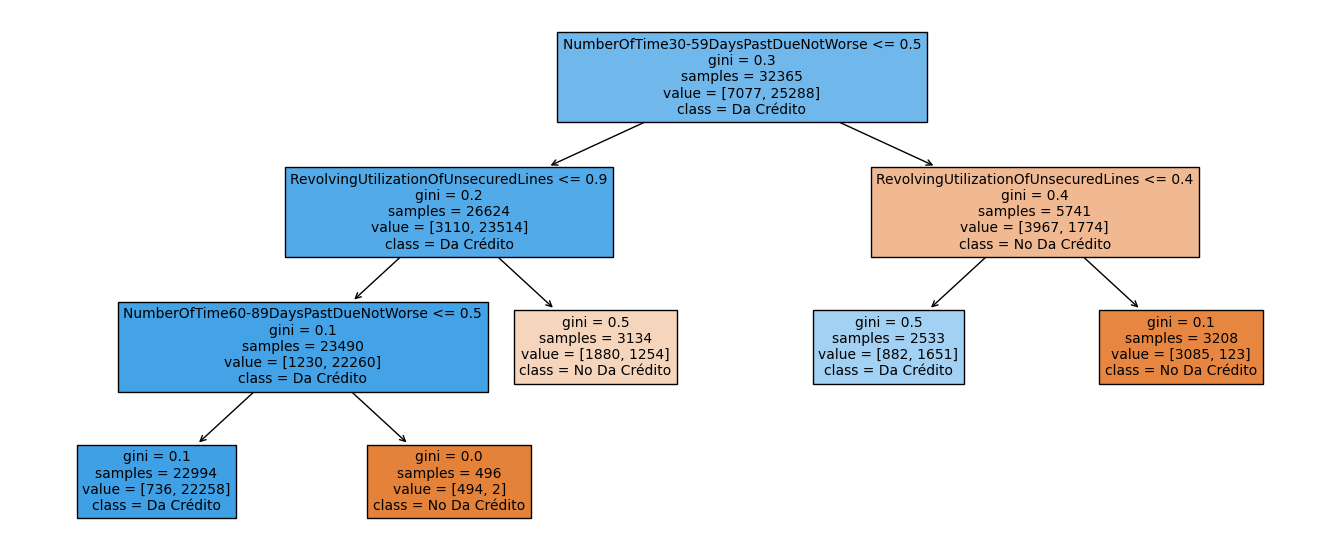

In [129]:
matplotlib.rc('figure', figsize=(17, 7))
tree.plot_tree(clf, 
               feature_names=list(X_test.columns),
               class_names=['No Da Crédito','Da Crédito'],
               filled=True,
               proportion = False,
               precision = 1,
               fontsize = 10)
plt.show()

**RESPUESTA:** Vemos que el árbol entrenado utiliza 3 variables para realizar las particiones de los datos y así decidir si se da o no el crédito. Las variables son:
- RevolvingUtilizationOfUnsecuredLines: Esta variable tiene sentido usarla ya que se relaciona con la capacidad que tiene el cliente en las distintas lineas de crédito, entre mayor sea su capacidad mayor probabilidad de darle un crédito.
- NumberOfTime60-89DaysPastDueNotWorse: Esta variable indica el número de veces que el prestatario ha estado en mora entre 60 a 89 días, en este caso si no ha estado en mora por esa cantidad de días mayor probabilidad de dar el crédito.
- NumberOfTime30-59DaysPastDueNotWorse: Esta variable indica el número de veces que el prestatario ha esta en mora entre 30 a 59 días, en este caso si no ha estado en mora por esa cantidad de días mayor probabilidad de dar el crédito.

### Tarea 7: Qué ocurre en los puntos anteriores si ahora la penalización cuando el banco da un crédito a un cliente que no paga es -1? ¿Y si se va haciendo aún más pequeña la penalización?

A continuación, definimos la función ***runExperiment()*** que nos permitirá correr varios experimentos variando la penalidad.

In [130]:
def runExperiment(clientes: clientes, agent: LinearBandits, N = 10000, training_mode = True):
    '''
    Esta función corre un experimento para unos clientes y agente dado, permitiendonos
    obtener las mismas métricas utilizadas anteriormente.

    Parámetros:
        - clientes: Corresponde a la clase clientes.
        - agent: Corresponde al agente utilizando la clase LinearBandits.
        - N: Corresponde a los primeros N clientets sobre los cuales el agente realiza una acción.
        - training_mode: Si esta en True los pesos (Q) del agente se van actualizando en el proceso,
        caso contrario, unicamente se obtienen las acciones dadas por el agente y no se actualiza Q.

    '''

    # Reward
    reward_promedio, reward_total, reward_total_vec  = [], 0, []
    #Regret
    regret_promedio, regret_total, regret_total_vec = [], 0, []

    # Agente contextual lineal
    ag = agent

    for i in tqdm(range(N)):
        clientes.cliente()

        # Obtenemos el contexto
        contexto = clientes.get_context()

        # Escogemos una acción de acuerdo al contexto
        action = ag.action(np.array(contexto))
        reward = clientes.get_reward(action)

        # Actuaizamos el modelo
        if training_mode:
            ag.update(contexto, action, reward)

        reward_total += reward
        regret = clientes.getBestReward()-reward
        regret_total += regret
        reward_promedio.append(reward_total/(i+1)) # i+1 es el número de iteraciones
        reward_total_vec.append(reward_total)
        regret_promedio.append(regret_total/(i+1))
        regret_total_vec.append(regret_total)

    print("Reward promedio:", reward_total/N)
    print("Regret promedio:", regret_total/N)
    makePlots(reward_total_vec, reward_promedio, regret_total_vec, regret_promedio)

Se prueban 3 valores adicionales de penalidad [-1, -0.5, -0.1].

1. Penalidad $-1$.

**RESPUESTA:** Se puede apreciar que existe una clara mejora en el modelo, esto se debe a que al disminuir la penalidad tenemos un agente "más arriesgado" al dar los créditos. Es decir, a diferencia del modelo anterior, este agente da una mayor cantidad de créditos (volviendolo menos sensible al contexto).

100%|██████████| 10000/10000 [00:22<00:00, 442.75it/s]


Reward promedio: 0.8559
Regret promedio: 0.0764


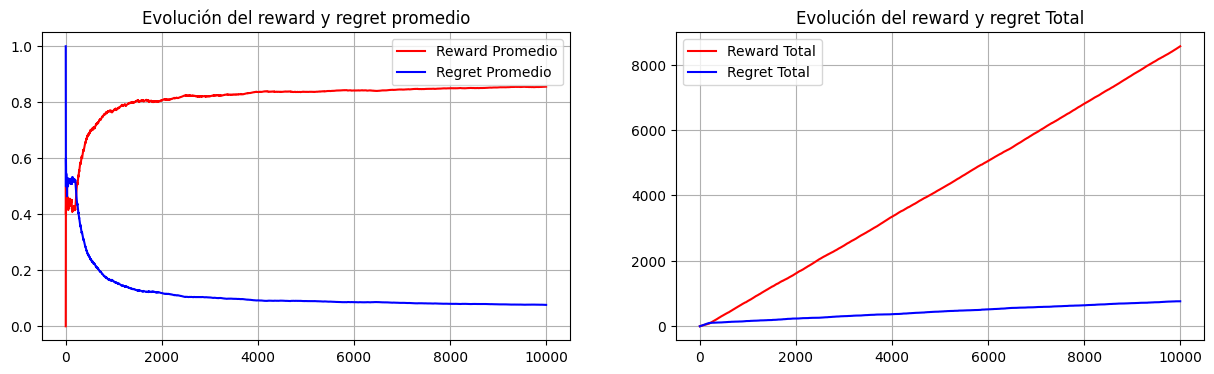

In [131]:
cl_train_2 = clientes(df_train, penalty=-1)
lb2 = LinearBandits(len(available_actions), n_features, initial_pulls=100)
matplotlib.rc('figure', figsize=(15, 4))
runExperiment(cl_train_2, lb2)

2. Penalidad $-0.5$.

**RESPUESTA:** Nuevamente al disminuir la penalidad al dar un crédito (y que el cliente caiga en mora) tiene un menor peso (penalidad), por lo que el modelo tiende a dar más créditos, mejorando el reward promedio y minimizando el regret.

100%|██████████| 10000/10000 [00:30<00:00, 323.89it/s]


Reward promedio: 0.88745
Regret promedio: 0.04485


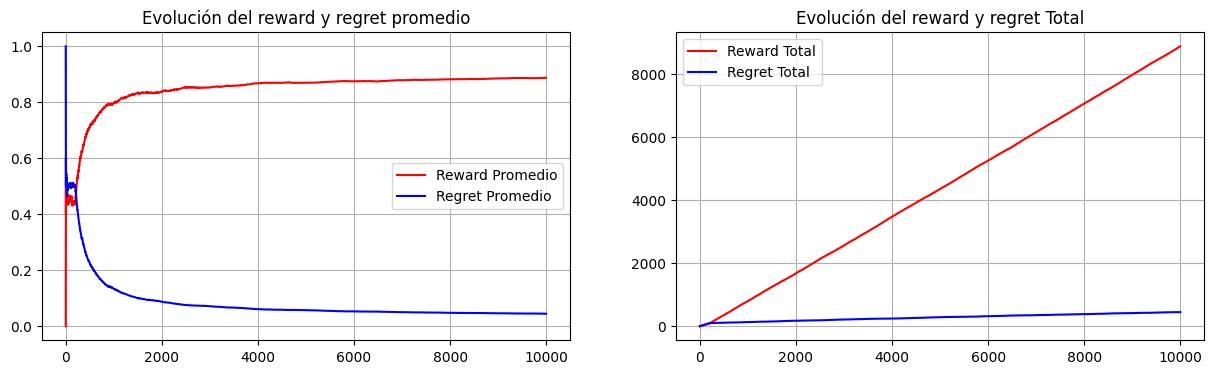

In [132]:
cl_train_3 = clientes(df_train, penalty=-0.5)
lb3 = LinearBandits(len(available_actions), n_features, initial_pulls=100)
matplotlib.rc('figure', figsize=(15, 4))
runExperiment(cl_train_3, lb3)

3. Penalidad $-0.1$

**RESPUESTA:** De igual forma al bajar más la penalidad vemos que se tiende a mejorar el reward recibido. Es importante tomar en cuenta que estamos trabajando con un dataset muy desbalanceado (teniendo pocos clientes en mora $7$%) por lo que en este caso el bajar mucho la penalidad (incluso a cero) no se penaliza mucho por lo que es mejor dar simpre el crédito. Sin embargo, con un dataset mejor balanceado (y en la vida real) el disminuir demasiado la penalidad podría insidir negativamente en los rewards recibidos.

Además, si comparamos este modelo con el algoritmo que da simpre el crédito (con un a penalidad de $-0.1$) veríamos que obtendríamos resultados similares. Para este ejemplo en particular escoger una adecuada penalidad es fundamental.

100%|██████████| 10000/10000 [00:33<00:00, 301.93it/s]


Reward promedio: 0.9149699999999893
Regret promedio: 0.017329999999999627


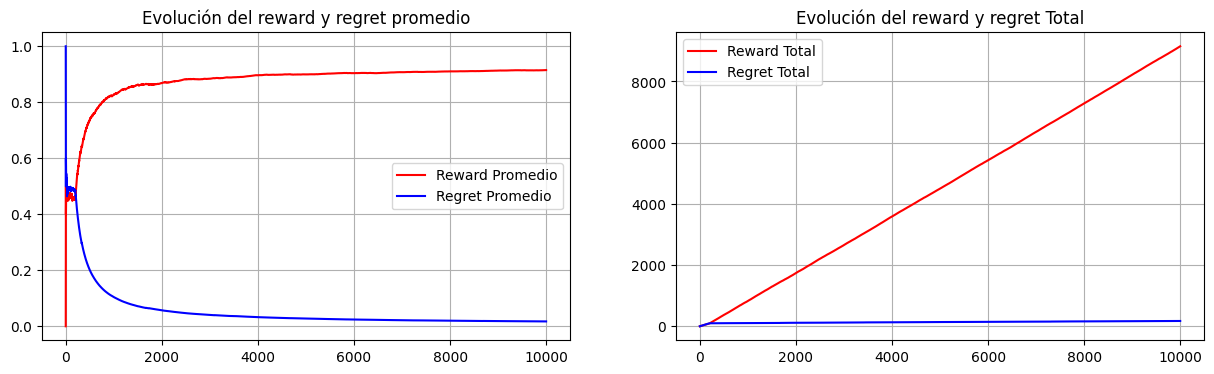

In [133]:
cl_train_4 = clientes(df_train, penalty=-0.1)
lb4 = LinearBandits(len(available_actions), n_features, initial_pulls=100)
matplotlib.rc('figure', figsize=(15, 4))
runExperiment(cl_train_4, lb4)

### Tarea 8: Optimiza tu sistema haciendo selección de variables.

A continuación, obtenemos una copia del dataset de entrenamiento.

In [134]:
X_train = df_train.copy()
y_train = df_train['SeriousDlqin2yrs']
X_train.drop(columns=['SeriousDlqin2yrs'], inplace=True)
print(df_train.shape)
df_train.head()

(75518, 11)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
135262,0,0.064833,59,0,0.156957,16666.0,5,0,1,0,2.0
14308,0,0.209079,30,0,0.129946,2400.0,7,0,0,0,0.0
124448,0,0.411271,58,0,0.150311,22000.0,11,0,1,0,0.0
113232,0,0.929365,33,1,0.281286,6000.0,6,0,1,0,0.0
83942,0,0.359039,50,0,0.323219,14500.0,7,0,2,0,2.0


Obtenemos las acciones tomadas por el agente (con una penalización de $-1$) para los datos de entrenamiento.

In [135]:
taked_actions = []
for i in range(len(X_train)):
    contexto = X_train.iloc[i]
    action = lb2.action(np.array(contexto))
    taked_actions.append(action)
print('Total de Acciones Tomadas:',len(taked_actions))

Total de Acciones Tomadas: 75518


Ahora entrenamos un random forest (modelo subrogado) para obtener las variables más importantes para el agente.

In [136]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, taked_actions)

RandomForestClassifier(random_state=1)

Ahora obtenemos un plot con la impuereza de las distintas variables. En este caso vemos que las variables más importantes (variables que disminuyen más la impureza) son ordenadas de forma descendente.

Text(0, 0.5, 'Mean decrease in impurity')

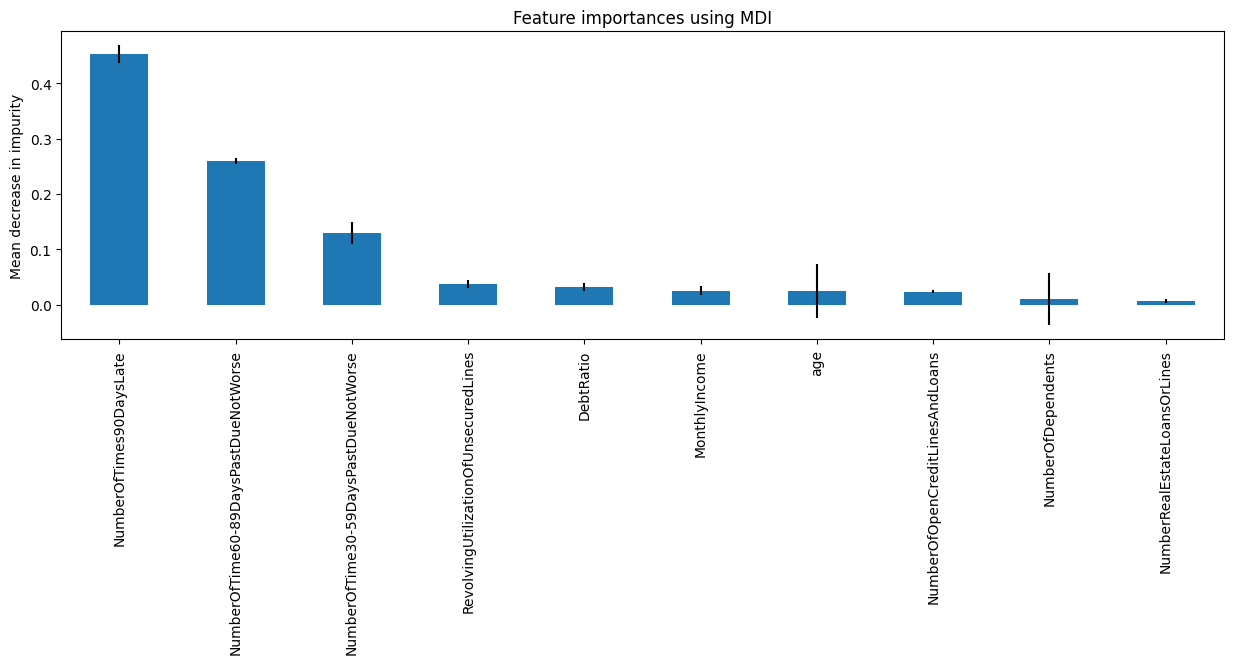

In [137]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X_train.columns)
forest_importances = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

Tomamos un umbral con el objetivo de tomar las variables más importantes, en este caso hemos decidido quedarnos con las primeras 3 variables (tomando un umbral de 0.1).

In [138]:
mdi_threshold = 0.1
fs = forest_importances[forest_importances >= mdi_threshold]
fs

NumberOfTimes90DaysLate                 0.452341
NumberOfTime60-89DaysPastDueNotWorse    0.258694
NumberOfTime30-59DaysPastDueNotWorse    0.129735
dtype: float64

In [139]:
fs_index =  ['SeriousDlqin2yrs'] + list(fs.index)
df_train_selected = df_train.copy()
df_train_selected = df_train_selected[fs_index]
df_train_selected.head()

,SeriousDlqin2yrs,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTime30-59DaysPastDueNotWorse
135262,0,0,0,0
14308,0,0,0,0
124448,0,0,0,0
113232,0,0,0,1
83942,0,0,0,0


Corremos el experimento con los datos de entrenamiendo (con las variables seleccionadas) y con una penalidad de $-1$.

100%|██████████| 10000/10000 [00:24<00:00, 413.62it/s]


Reward promedio: 0.8555
Regret promedio: 0.0768


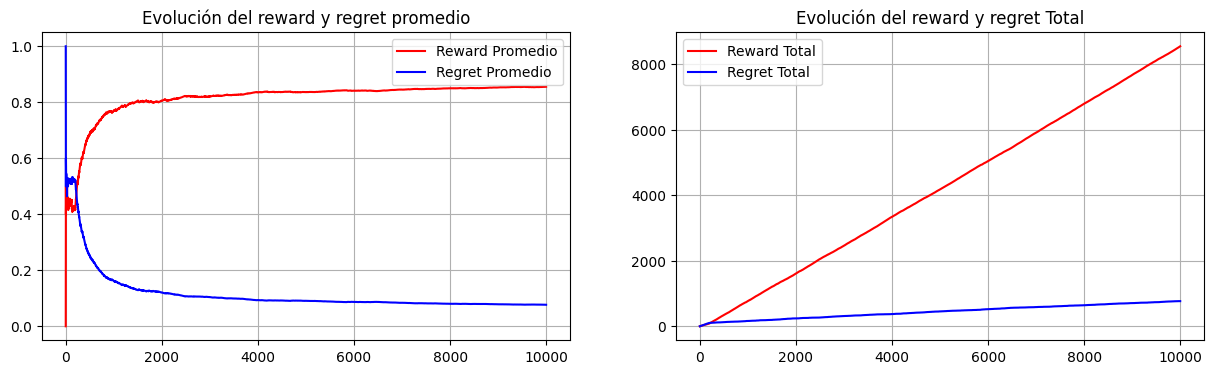

In [140]:
cl_selected = clientes(df_train_selected, penalty=-1)
lb_selected = LinearBandits(len(available_actions), len(fs_index) - 1 , initial_pulls=100)
runExperiment(cl_selected, lb_selected)

**RESPUESTA:** Con se puede apreciar en las métricas y gráficas (en los datos de entrenamiento) presentadas al utilizar las primeras 3 variables más importantes se mantiene el rendimiento del agente. Es decir, a pesar de disminuir el número de variables utilizadas el performance del agente no se ve impactado. Al utilizar menos variables el modelo se vuelve más eficiente (realizando una optimización del mismo).

Ahora, se aprecia los resultados del modelo optimizado sobre los datos de test. Los resultados obtenidos son consistentes con los obtenidos en el entrenamiento, mantenido unas métricas de reward y regret ligeramente mejores que en el entrenamiento, esto nos confirma que nuestro modelo esta realizando un trabajo adecuado. 

100%|██████████| 10000/10000 [00:04<00:00, 2441.89it/s]


Reward promedio: 0.8592
Regret promedio: 0.0677


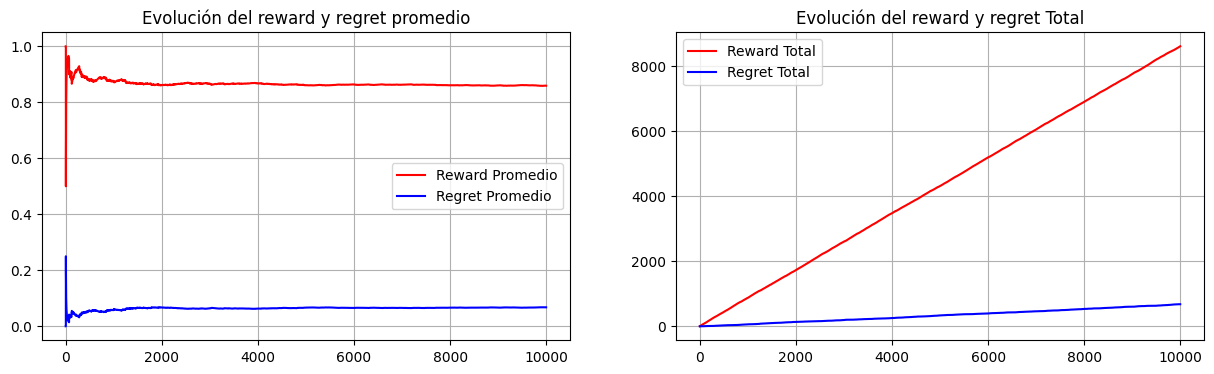

In [141]:
cl_selected_test = clientes(df_test[fs_index], penalty=-1)
runExperiment(cl_selected_test, lb_selected, training_mode=False)

Adicionalmente, se realiza un análisis de las acciones tomadas por el agente en los datos de test.

In [142]:
taked_actions = []
res = []
for i in tqdm(range(len(X_test))):
    contexto = X_test.iloc[i][fs_index[1:]]
    action = lb_selected.action(np.array(contexto))
    taked_actions.append(action)
    if action == 1:# Dió el crédito
        if y_test[i] == 0: # El cliente pago el crédito
            res.append('Pagó')
        else:# El cliente NO pago el crédito
            res.append('No Pagó')
    else: # NO Dió el crédito
        if y_test[i] == 0: # El cliente pago el crédito
            res.append('Pagó')
        else:# El cliente NO pago el crédito
            res.append('No Pagó')


print('Total de Acciones tomadas:',len(taked_actions))

100%|██████████| 32365/32365 [00:13<00:00, 2414.10it/s]

Total de Acciones tomadas: 32365


El agente dió el $98\%$ de los créditos, mientras que solo un $2\%$ de los clientes no obtuvieron un crédito.

In [143]:
resultados = pd.DataFrame({'Accion': taked_actions, 'Resultado': res})

print('Créditos Dados y No dados')
general_res = resultados.groupby(['Accion']).size().reset_index(name='count')
general_res['Porcentaje'] = general_res['count'] * 100 / len(taked_actions)
general_res

Créditos Dados y No dados


,Accion,count,Porcentaje
0,0,653,2.017612
1,1,31712,97.982388


El modelo tuvo un error de 2,251 (7%) entre los clientes que el modelo no les dió el crédito (pero si habrían pagado) y los que sí se les dió el crédito (pero no pagaron). Estos errores Tipo 1 y 2 se podrían controlar aumentando o disminuyendo la penalización del modelo. Por ejemplo, sí aumentarármos la penalización el error tipo 1 sería menor (ya que sería un modelo más restrictivo al dar el crédito), pero aumentaría el error tipo 2 (ya que tendríamos más clientes que no se les dió el crédito pero sí habrían pagado).

In [144]:
general_res_2 = resultados.groupby(['Accion', 'Resultado']).size().reset_index(name='value')
general_res_2.pivot(index='Accion', columns='Resultado', values='value')

Resultado,No Pagó,Pagó
Accion,,
0,394,259
1,1992,29720


A continuación, calculamos el costo de oportunidad perdida:

$$\textrm{Costo de Oportunidad Perdida} = \textrm{Valor de la Mejor Acción Sacrificada} - \textrm{Valor de la Acción Elegida} .$$

In [150]:
best_actions = [1 if x == 0 else 0 for x in y_test] # Invertimos y_test para que 1 represente la accion que se debio haber tomado (ground truth)
lost_opportunity_cost = [x - y for x, y in zip(best_actions, taked_actions)]
print('Costo de Oportunidad Perdida: ', np.sum(lost_opportunity_cost))

Costo de Oportunidad Perdida:  -1733


Ahora mostramos la matriz de confusión de las mejores acciones (inverso de la variable _SeriousDlqin2yrs_) versus las acciones tomadas por el agente.

Text(0.5, 1.0, 'Matriz de Confusión')

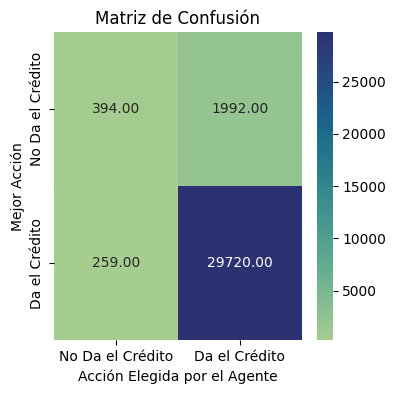

In [173]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sn

matplotlib.rc('figure', figsize=(4, 4))

df_cm = pd.DataFrame(confusion_matrix(best_actions, taked_actions))
df_cm.columns = ['No Da el Crédito', 'Da el Crédito']
df_cm.index  = ['No Da el Crédito', 'Da el Crédito']
sn.heatmap(df_cm, annot=True, fmt=".2f", cmap="crest")
plt.xlabel('Acción Elegida por el Agente')
plt.ylabel('Mejor Acción')
plt.title('Matriz de Confusión')

Adicionalmente, obtenemos un resumen de algunas métricas. Por ejemplo, vemos que el accuracy obtenido es de un  $93\%$ en las acciones tomadas por el agente el cual es un buen indicador. Sin emabargo, al tener datos sumamente desbalanceados esta métrica no es un buen indicador, por ejemplo si nos fijamos en la clase 0 (No da el crédito) obtenemos $60\%$, $17\%$, $26\%$ para la precisión, recall y media armónica, obteniendo malas métricas. Se debe recalcar que estas métricas se pueden mejorar (dependiendo del objetivo del product owner) para que castigué en mayor o menor medida dar un crédito según el valor de la penalidad (reward negativo) del agente. 

En este caso, sería conveniente aumentar la penalidad para tener un modelo más restrictivo al momento de otorgar un crédito (aumentando el error tipo 1).

In [174]:
print(classification_report(best_actions, taked_actions))

              precision    recall  f1-score   support

           0       0.60      0.17      0.26      2386
           1       0.94      0.99      0.96     29979

    accuracy                           0.93     32365
   macro avg       0.77      0.58      0.61     32365
weighted avg       0.91      0.93      0.91     32365



### Tarea 9: (Opcional). Investiga otras librerías que permitan implementar multiarmed bandits contextuales no lineales. Toma una de ellas y vuelve a realizar la tarea 3.